In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

In [3]:
% matplotlib inline

# Aufgabe 1

In [3]:
# function to load the data and preprocess the data
def read_preprocess(filename):
    f = open(filename)
    raw_data = f.readlines()
    
    point_lst = []
    for ele in raw_data:
        point = []
        for value in ele.split():
            point.append(float(value))
        point_lst.append(point)
        
    return np.array(point_lst)

In [4]:
filename = './zip.train'
training_array = read_preprocess(filename)

In [5]:
filename = './zip.test'
testing_array = read_preprocess(filename)

In [6]:
X = np.concatenate((training_array, testing_array), axis = 0)

In [7]:
X.shape

(9298, 257)

In [8]:
X_zero = X[X[:,0] == 0]
X_one = X[X[:,0] == 1]
X_two = X[X[:,0] == 2]
X_three = X[X[:,0] == 3]
X_four = X[X[:,0] == 4]
X_five = X[X[:,0] == 5]
X_six = X[X[:,0] == 6]
X_seven = X[X[:,0] == 7]
X_eight = X[X[:,0] == 8]
X_nine = X[X[:,0] == 9]

In [9]:
select_lst = [X_zero, X_one, X_two, X_three, X_four, X_five, X_six, X_seven, X_eight, X_nine]

In [112]:
class PCA:
    def __init__(self, normalized, output_dim = 2, method = 'svd'):
        self.method = method
        self.output_dim = output_dim
        self.normalized = normalized
    
    def _normalization(self, X):
        
        mean = np.mean(X, axis = 0)
        std = np.sqrt(np.var(X, axis = 0))
        
        X = (X - mean)/std

        return X
    
    def _covariance_matrix(self, X):
        n = X.shape[0]
        return X.T.dot(X)
    
    def _project_vector(self, cov):
        eigenvalue, eigenvector = np.linalg.eig(cov)
        index = np.argsort(eigenvalue)
        project_vector = eigenvector[index[-self.output_dim:]].T
        
        return project_vector
    
    def _SVD(self, data):
        _, s, v = np.linalg.svd(data)
        index = np.argsort(s)
        project_vector = v[index[-self.output_dim:]].T
        
        return project_vector
        
    def fit(self, X):
        if self.normalized == False:
            data = self._normalization(X)
        else:
            data = X[:,1:]
        y = X[:,0]
        
        label = np.unique(y)
        
        if self.method == 'cov':
            
            cov = self._covariance_matrix(data)
            project_vector = self._project_vector(cov)

            self.projected = data.dot(project_vector)

            self.projected_one = self.projected[y == label[0]] 
            self.projected_two = projected[y == label[1]] 

        if self.method == 'svd':
            project_vector = self._SVD(data)
            
            self.projected = data.dot(project_vector)

            self.projected_one = self.projected[y == label[0]] 
            self.projected_two = self.projected[y == label[1]] 
            
    def plot(self, title):
        plt.figure(figsize=(8, 8))
        plt.title(title)
        
        plt.scatter(self.projected_one[:,0], self.projected_one[:,1], s= 3, color = 'red')
        plt.scatter(self.projected_two[:,0], self.projected_two[:,1], s= 3, color = 'black')

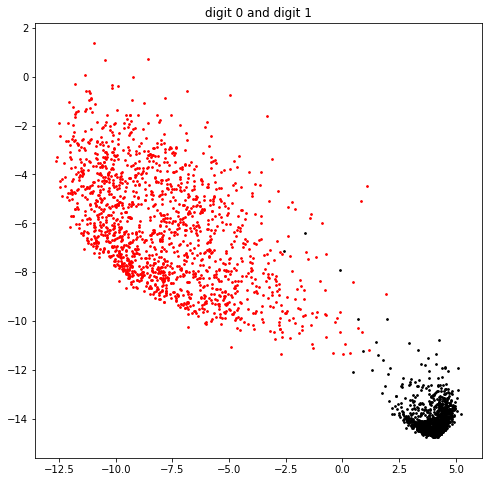

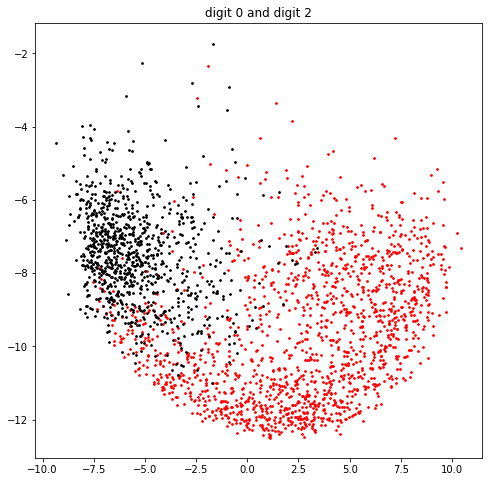

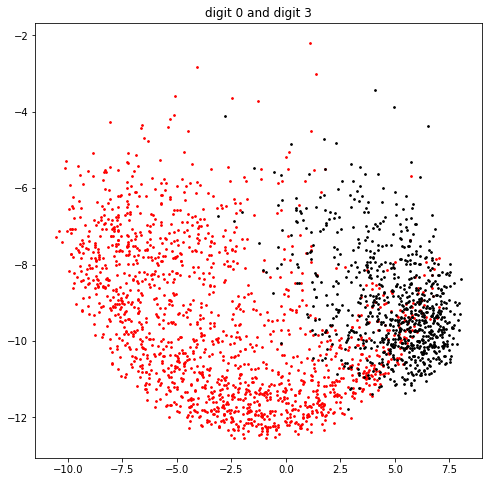

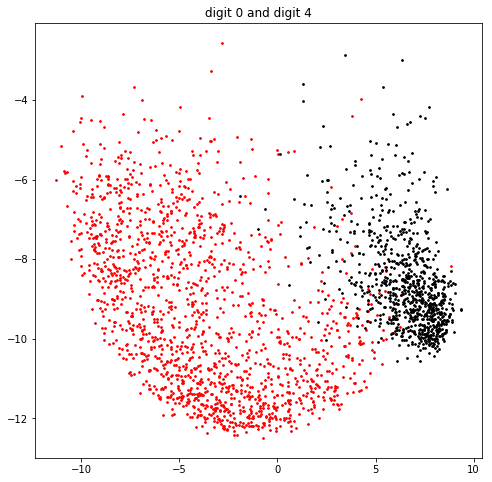

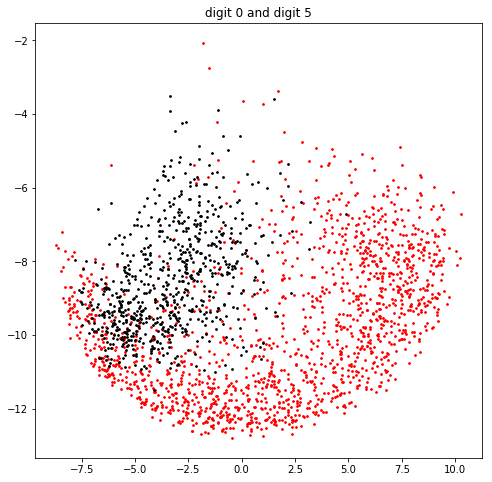

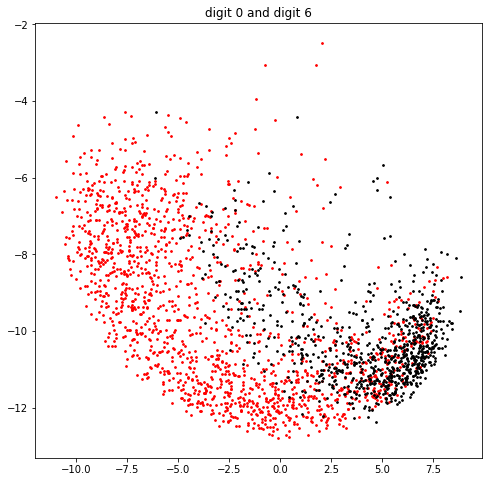

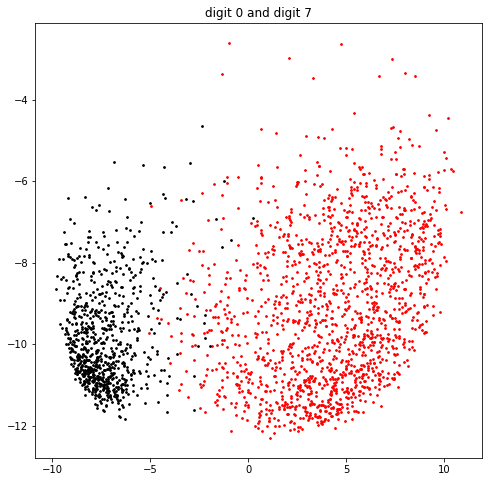

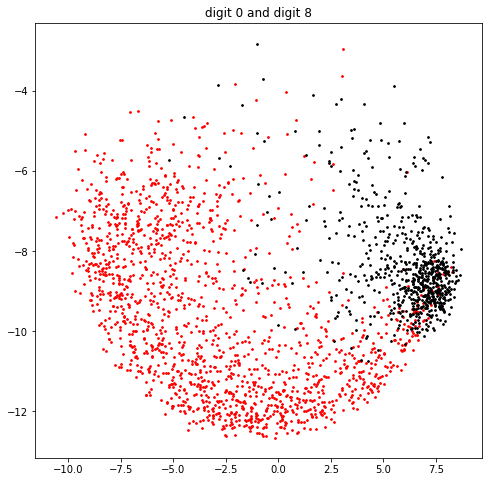

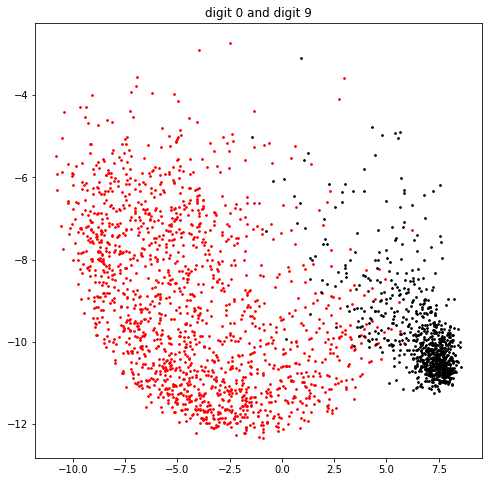

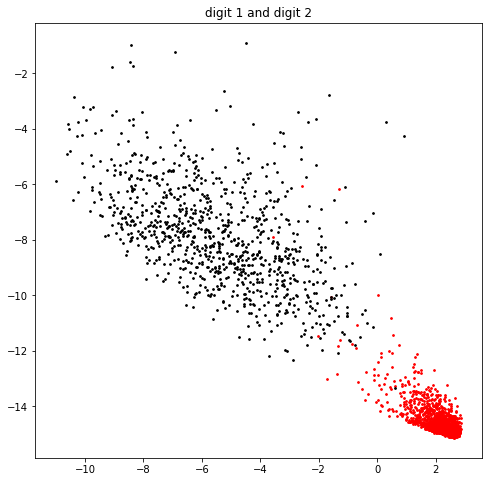

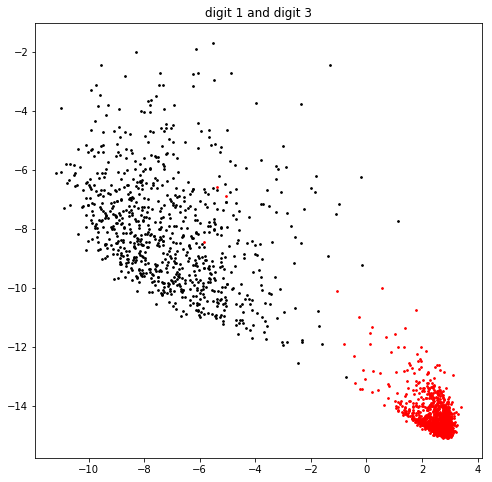

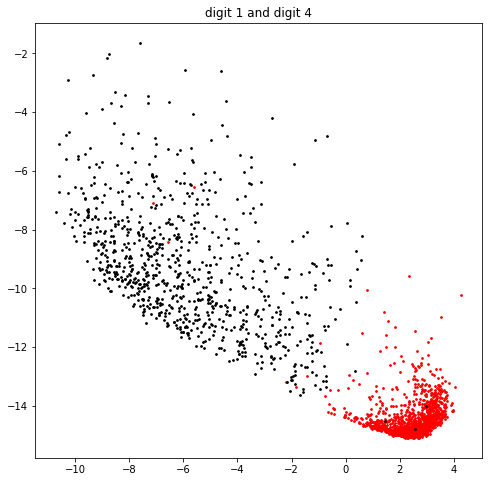

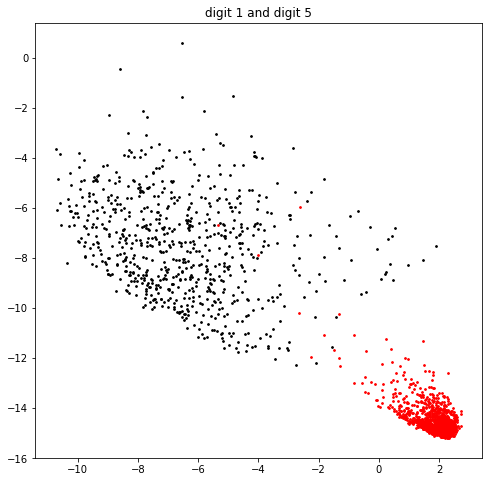

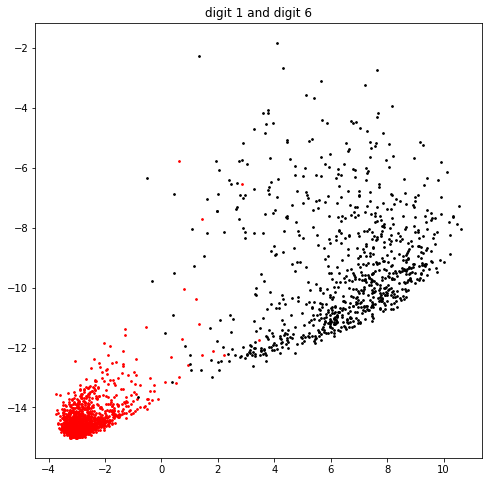

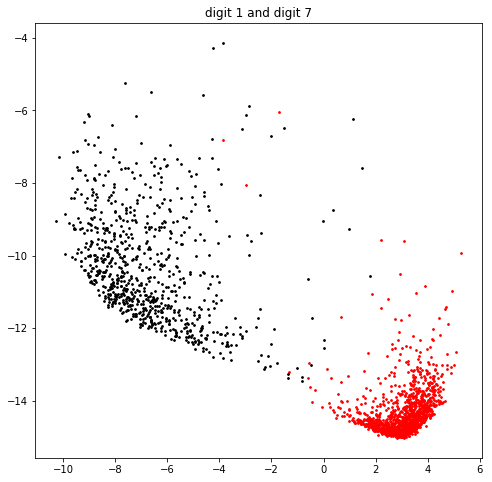

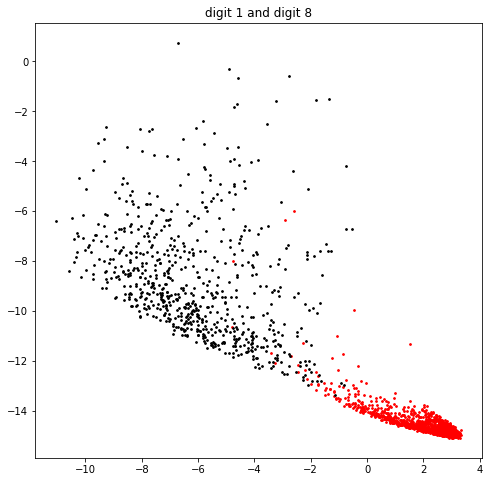

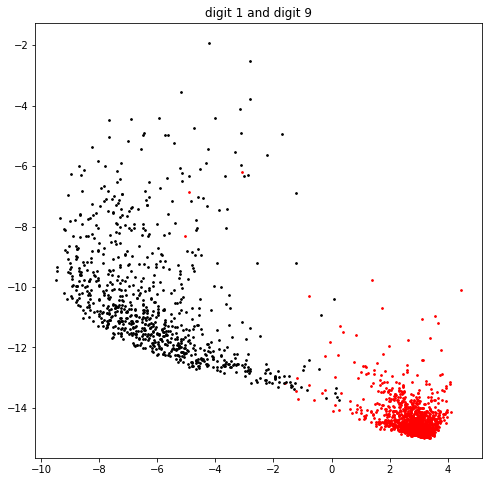

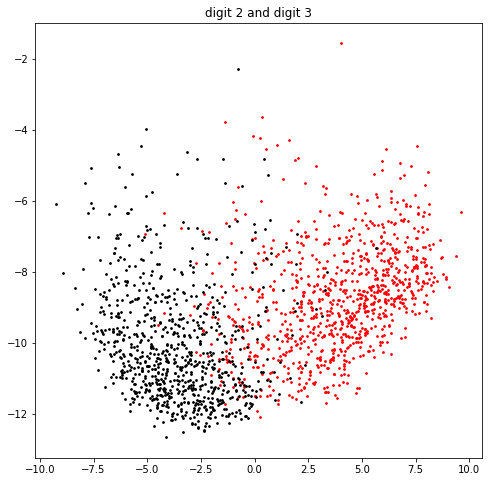

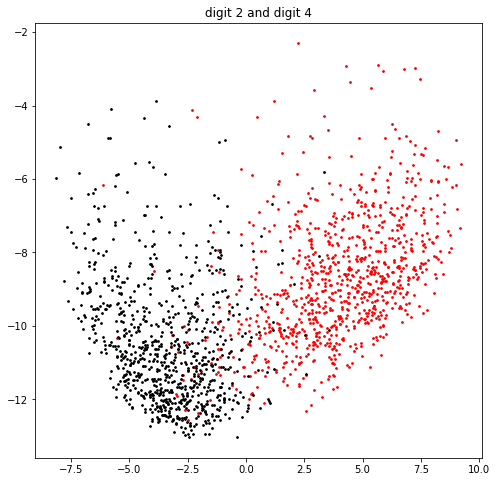

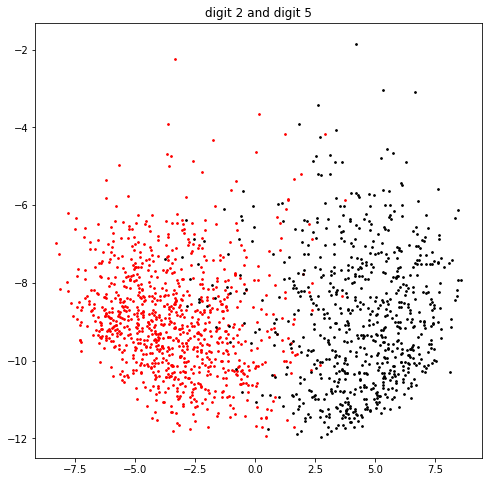

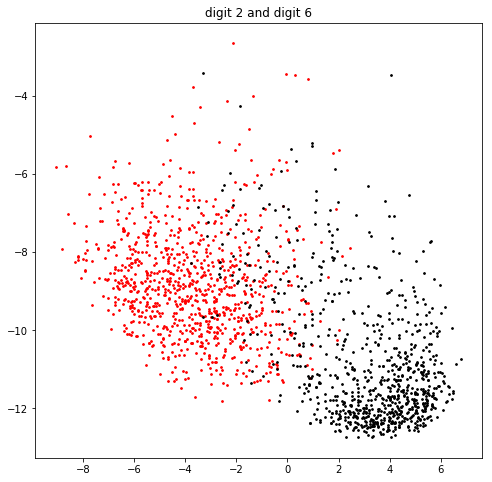

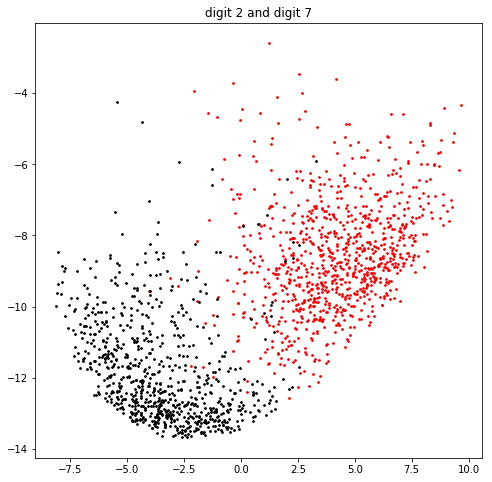

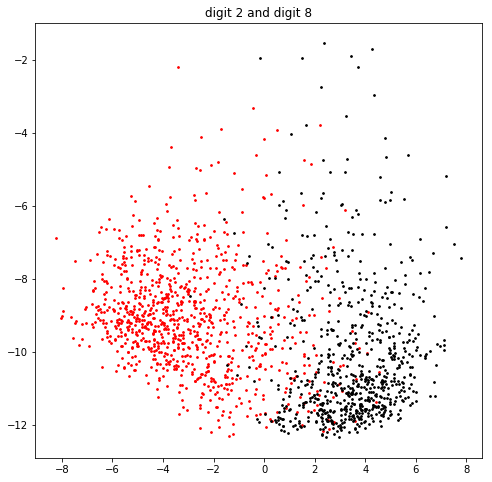

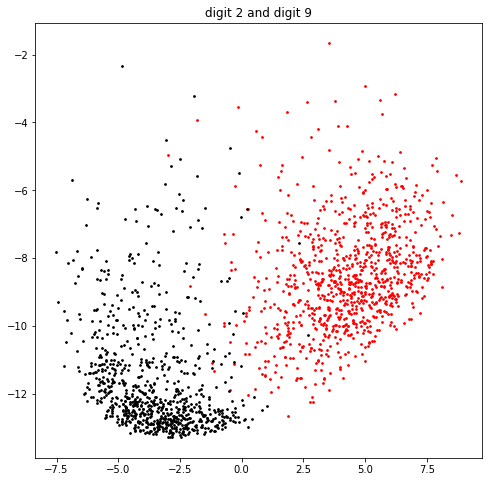

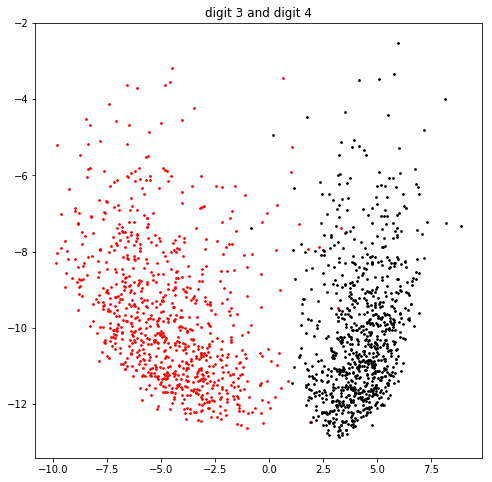

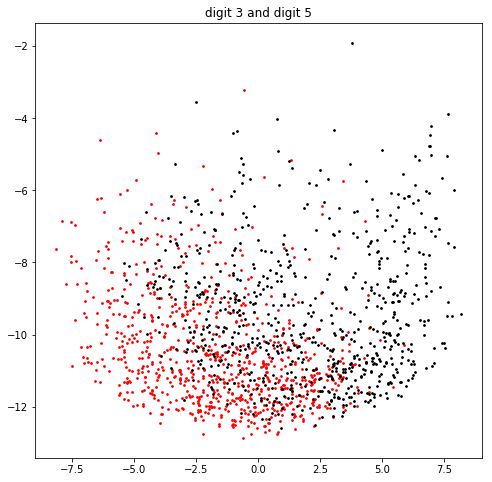

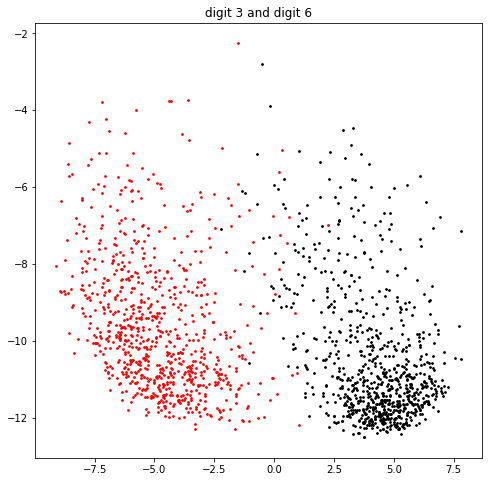

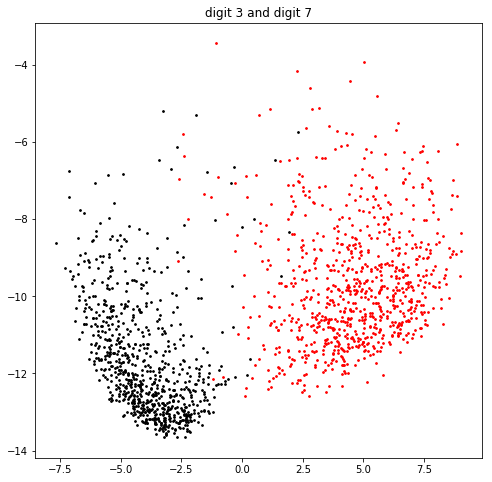

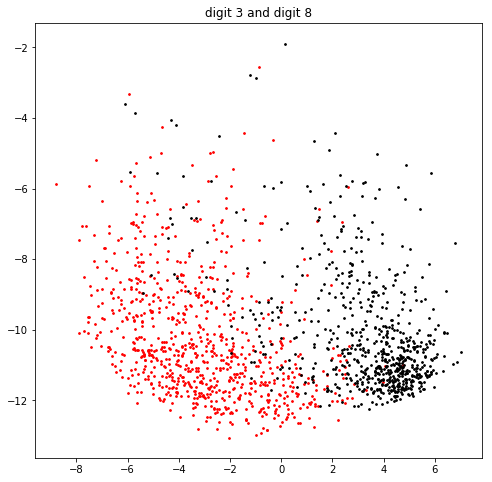

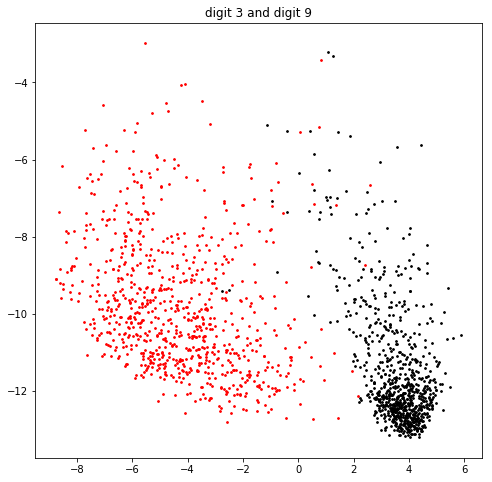

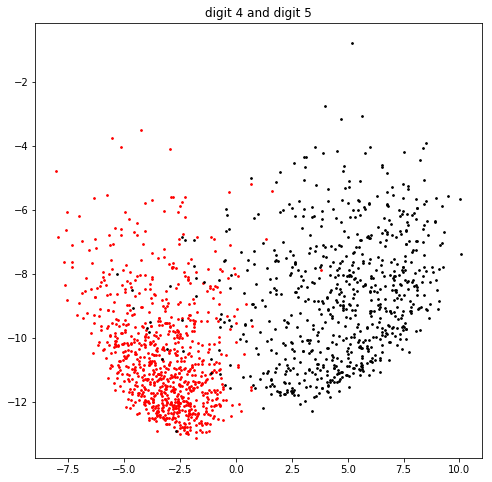

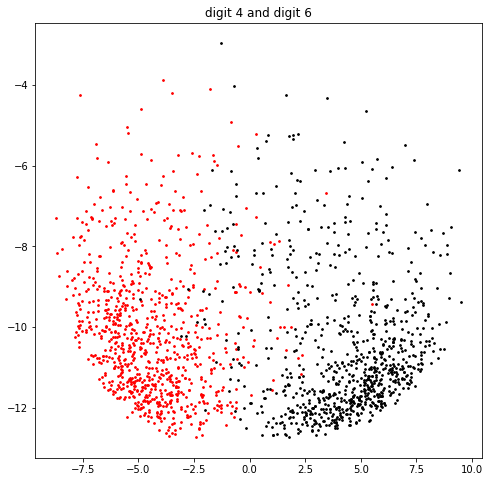

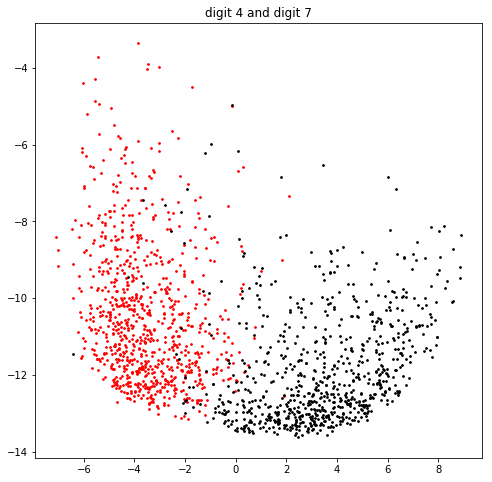

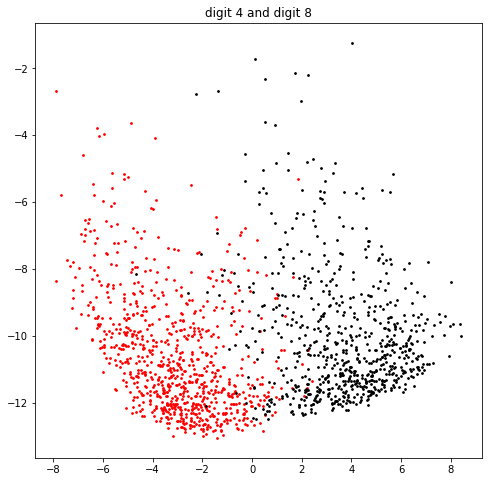

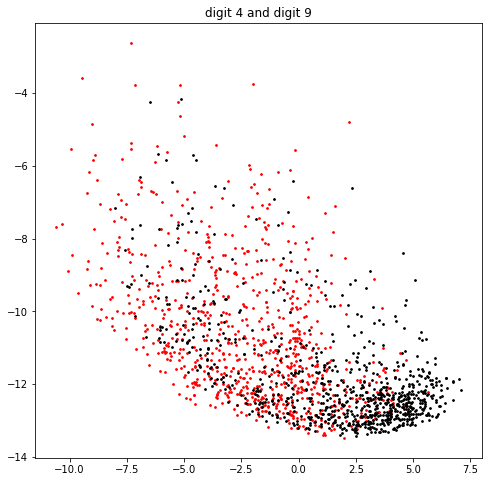

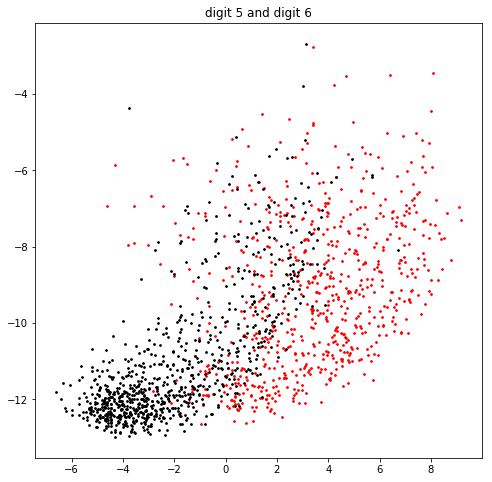

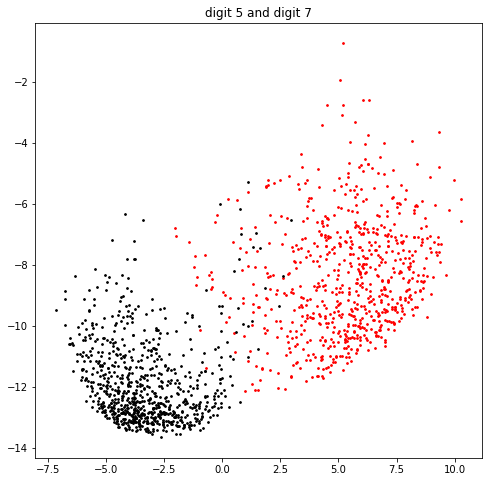

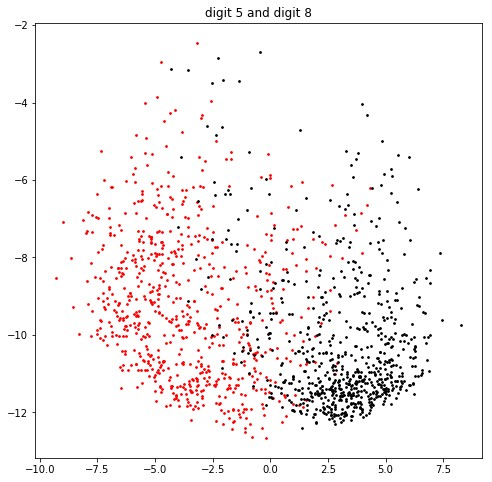

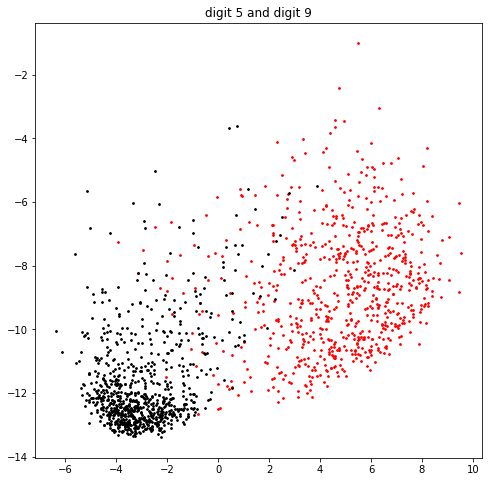

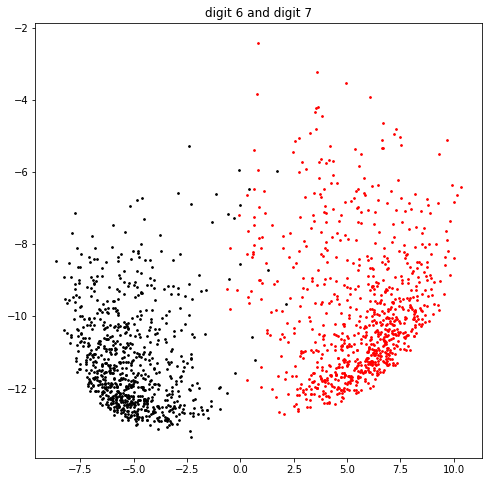

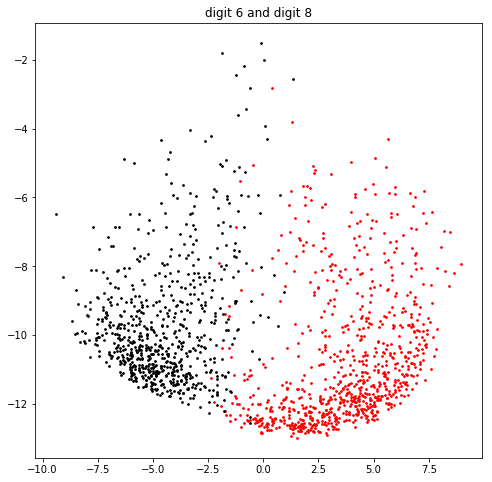

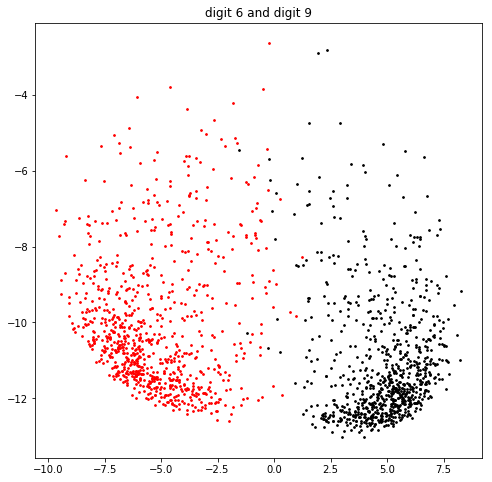

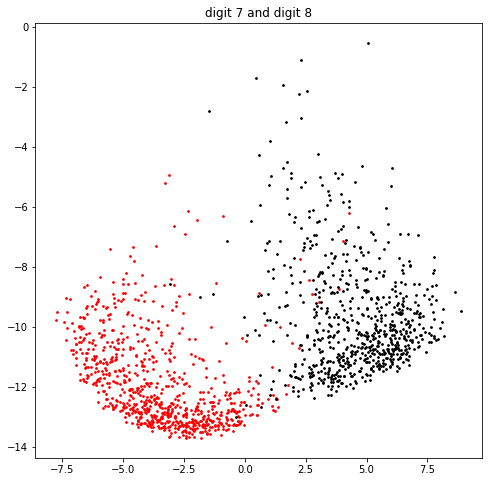

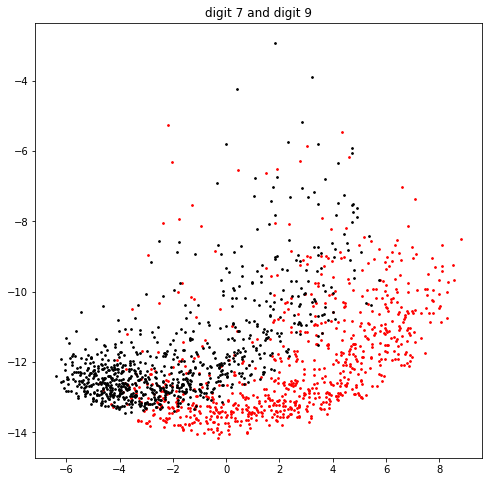

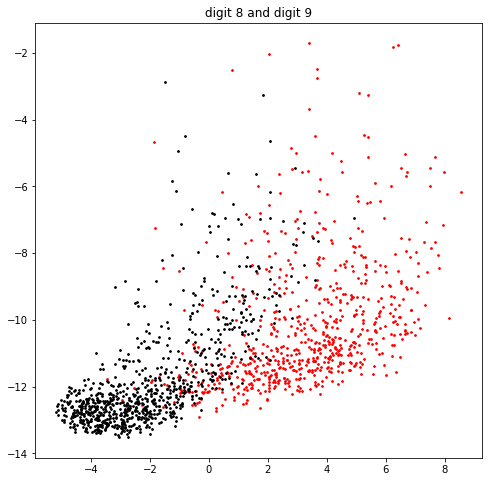

In [74]:
pca = PCA()
for i in combinations(range(10), 2):
    pca.fit( np.concatenate((select_lst[i[0]], select_lst[i[1]]), axis = 0))
    
    title = "digit " + str(i[0]) + " and digit " + str(i[1])
    #info1 = "color red for digit " + str(i[0]) 
    #info2 = "color black for digit "+ str(i[1])
    
    pca.plot(title)

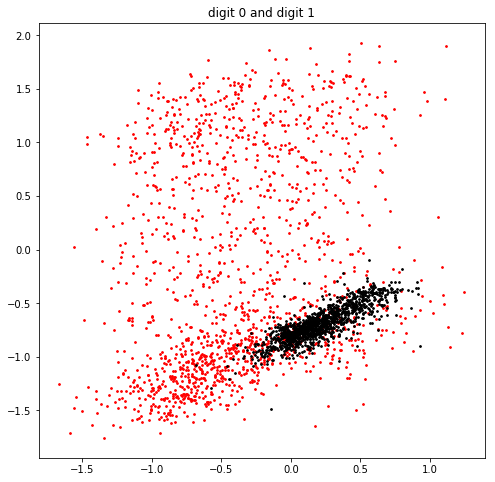

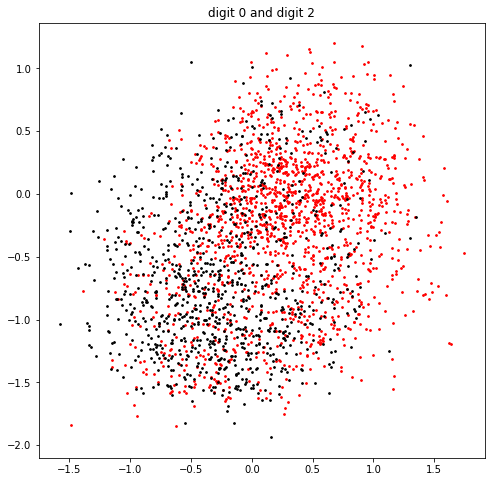

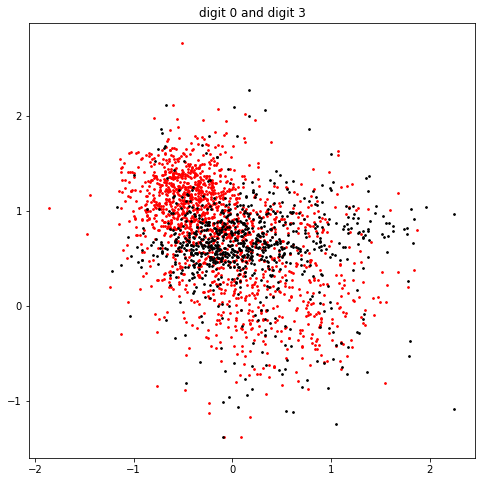

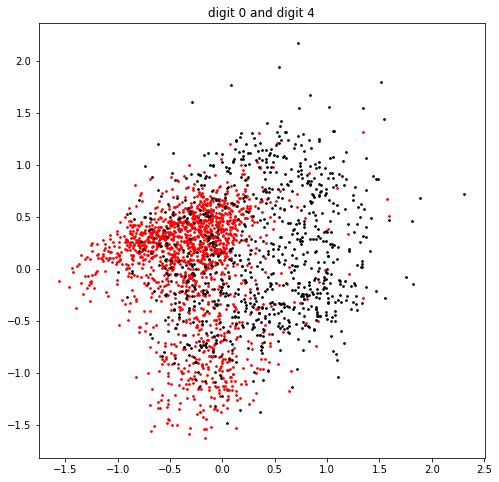

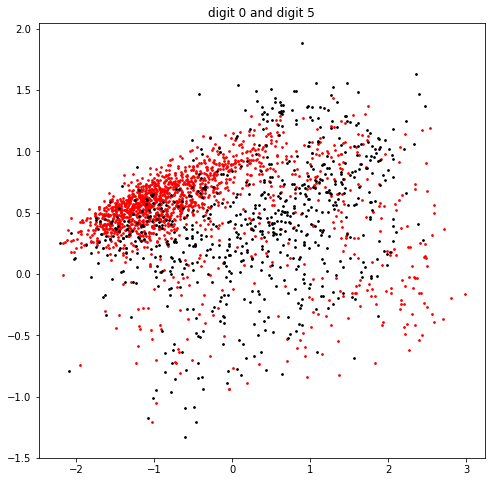

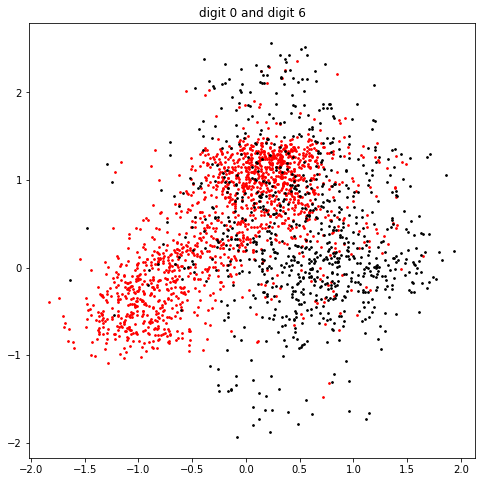

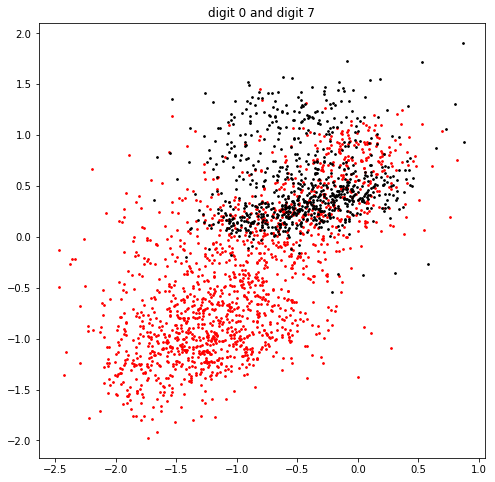

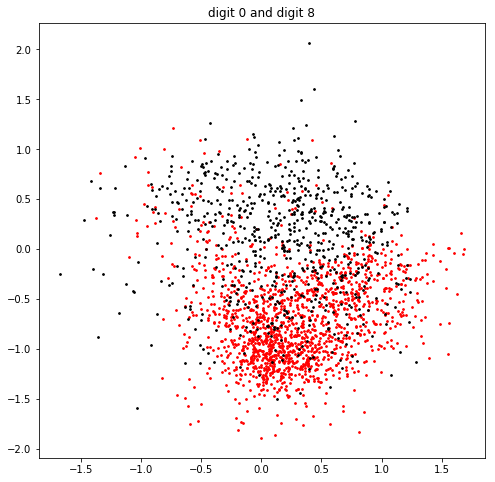

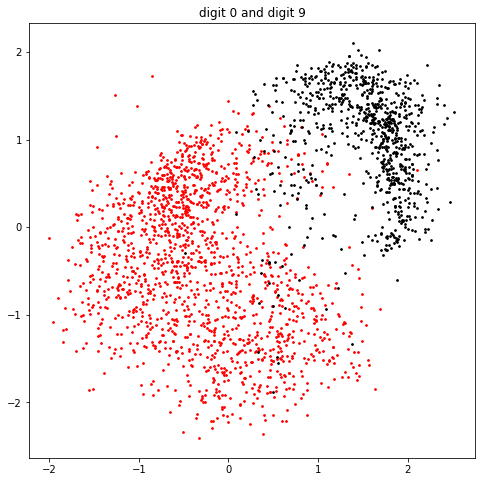

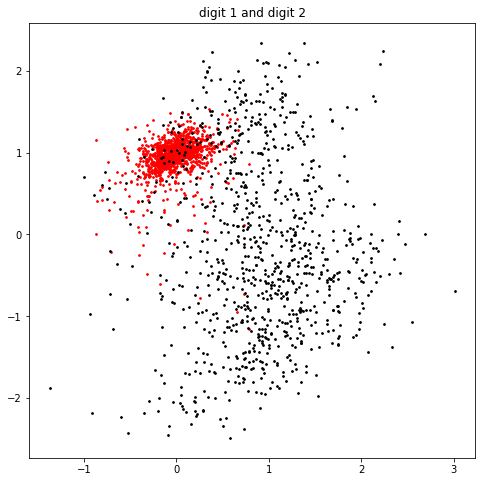

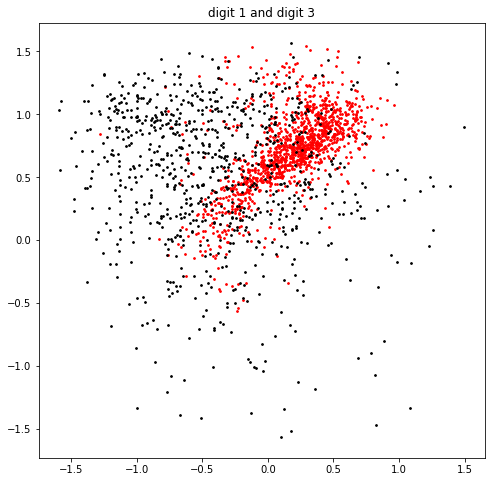

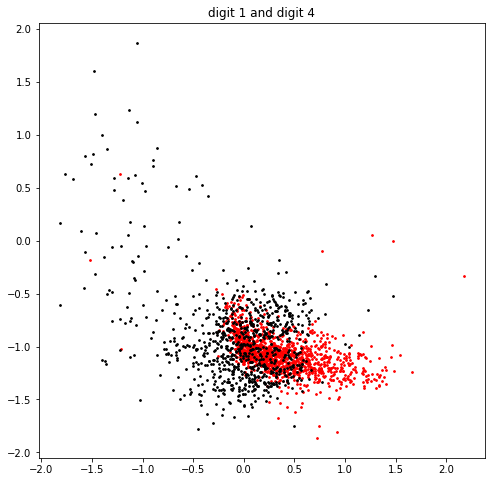

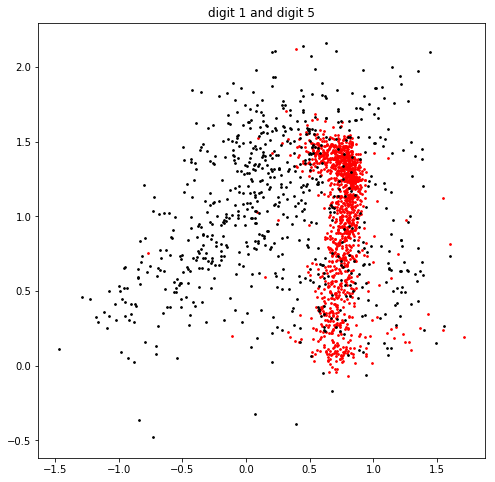

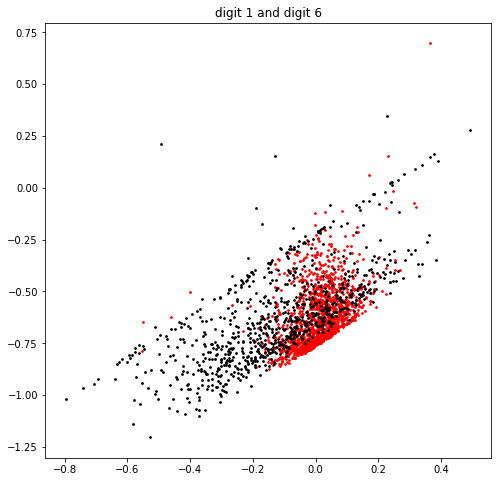

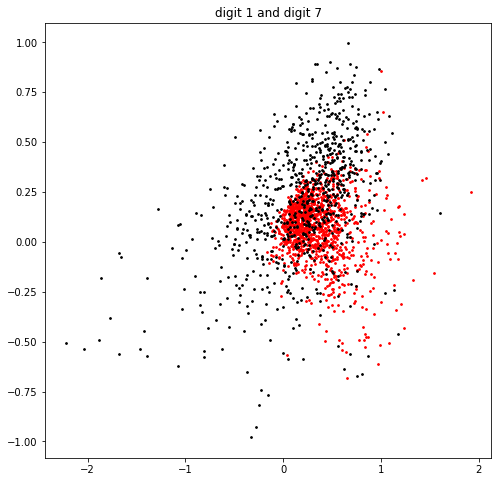

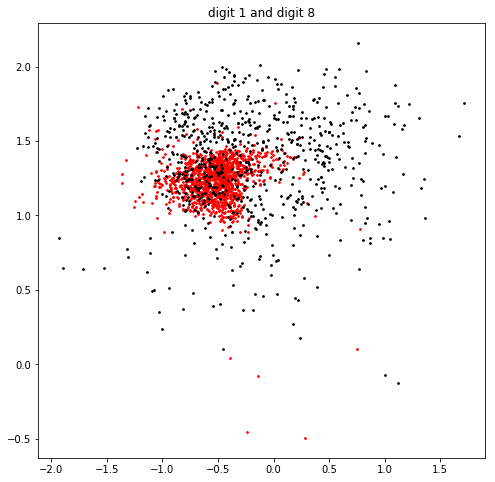

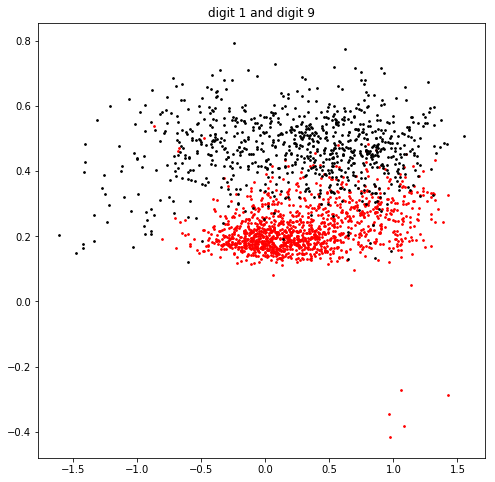

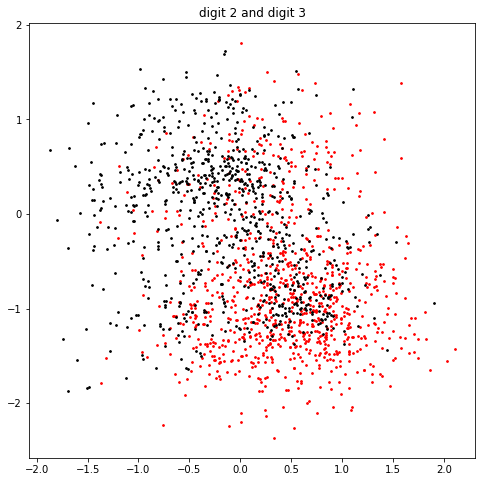

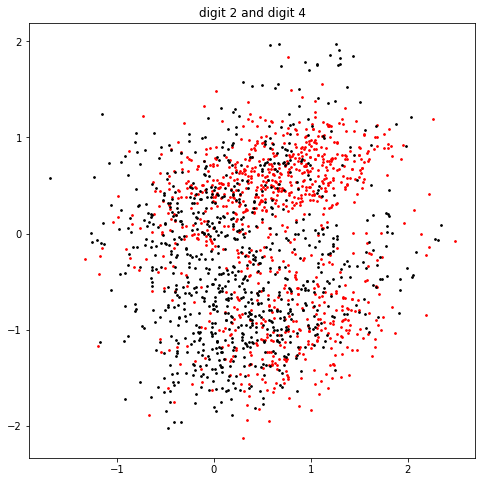

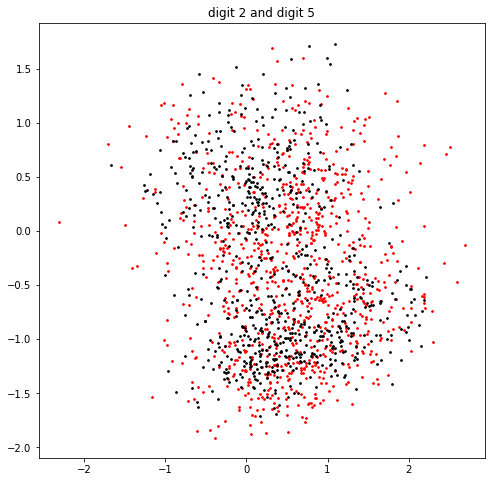

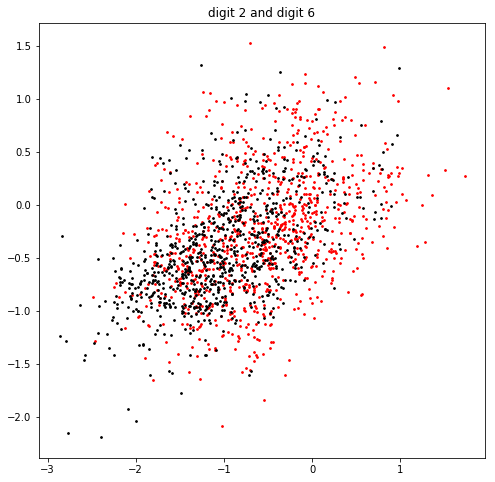

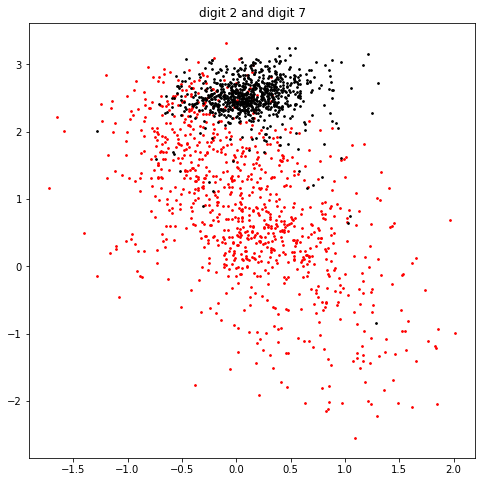

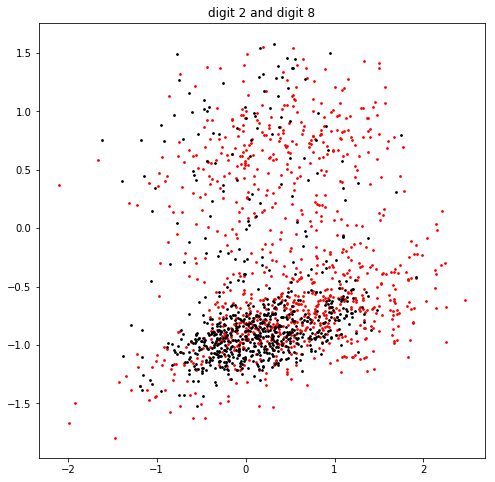

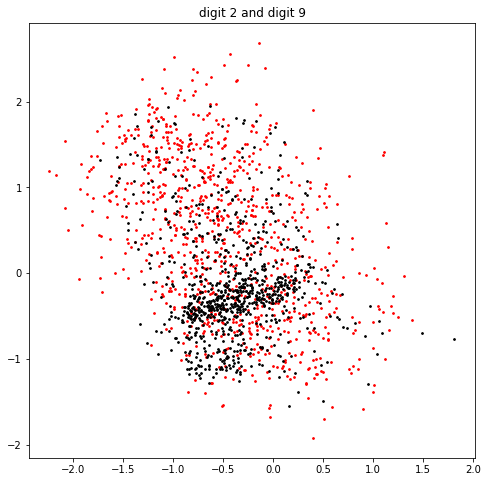

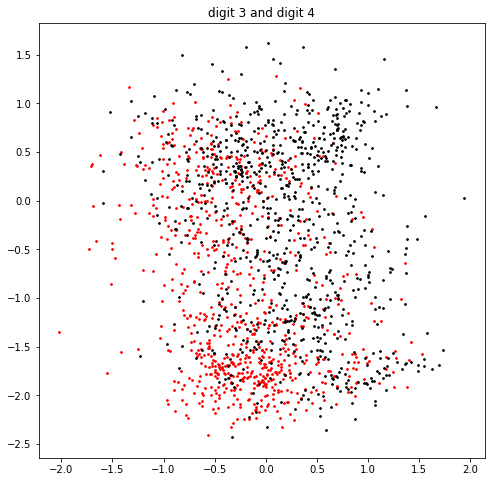

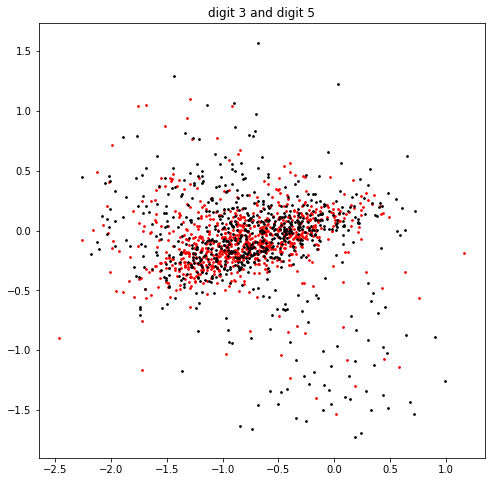

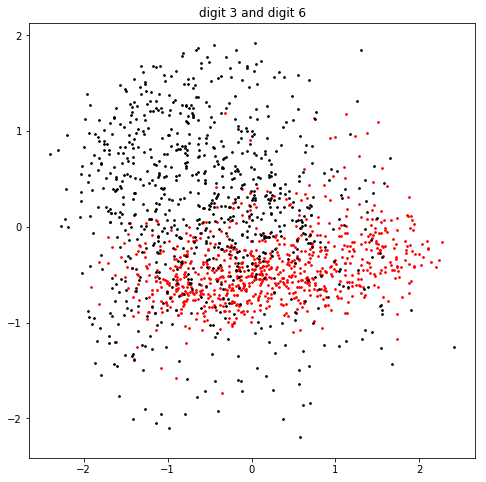

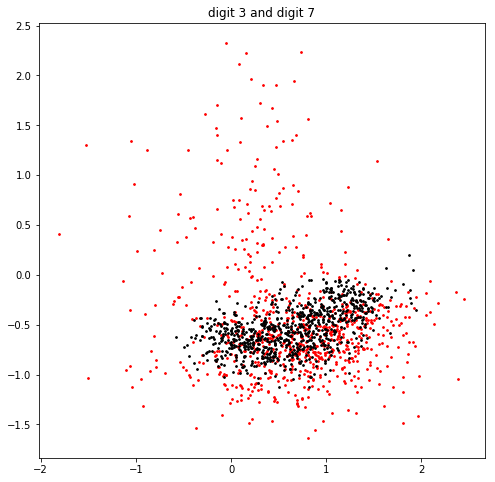

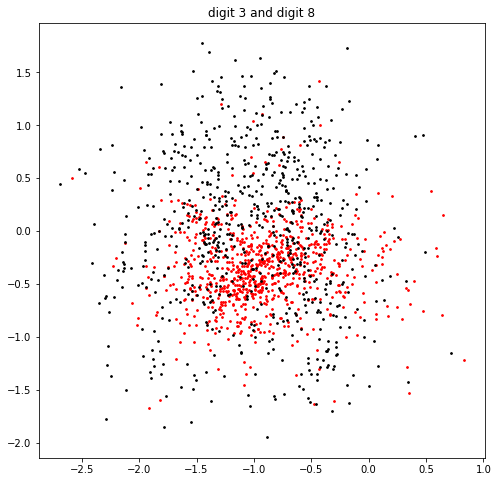

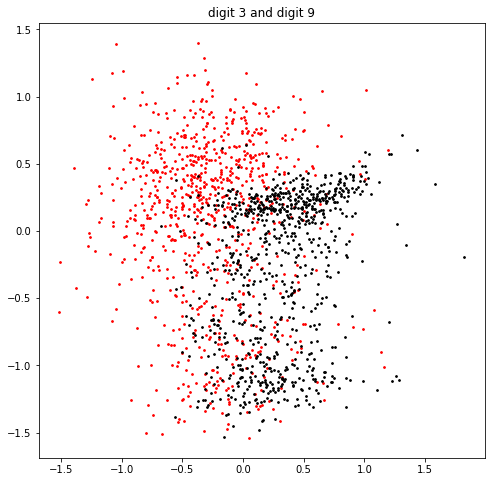

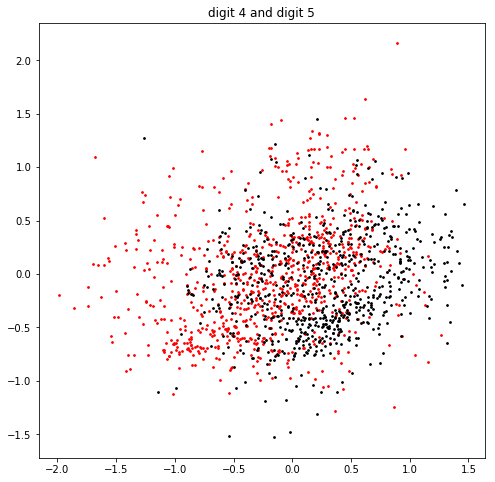

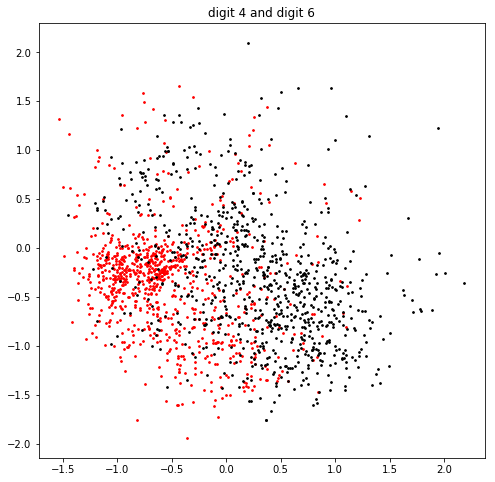

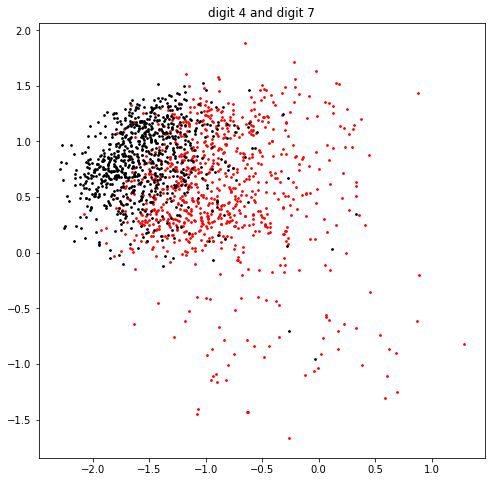

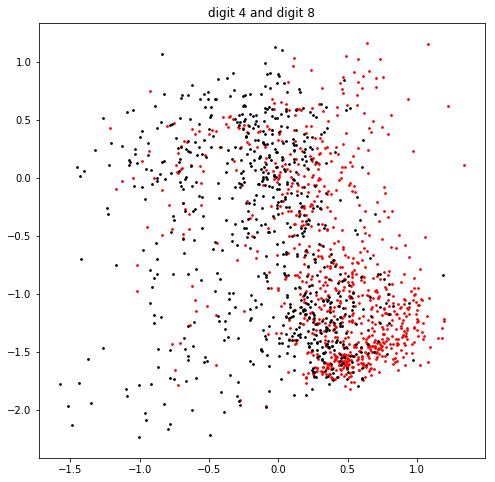

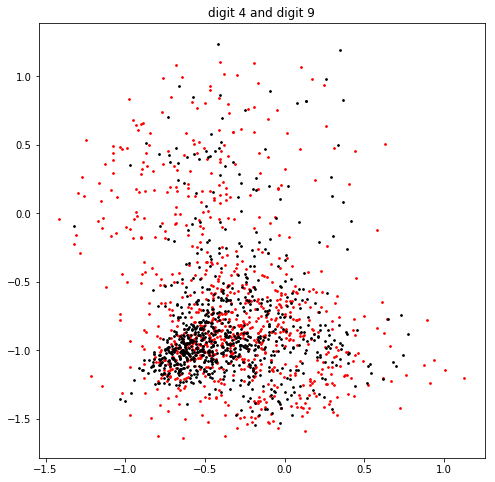

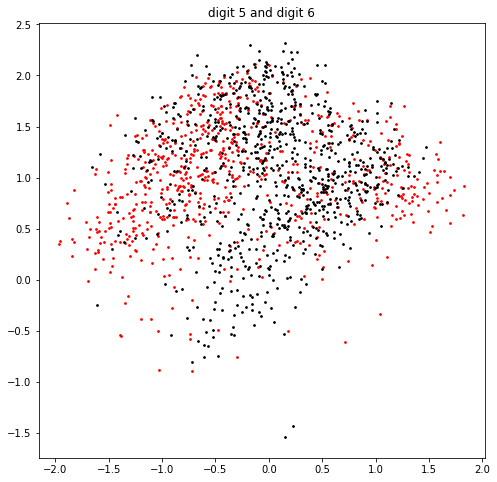

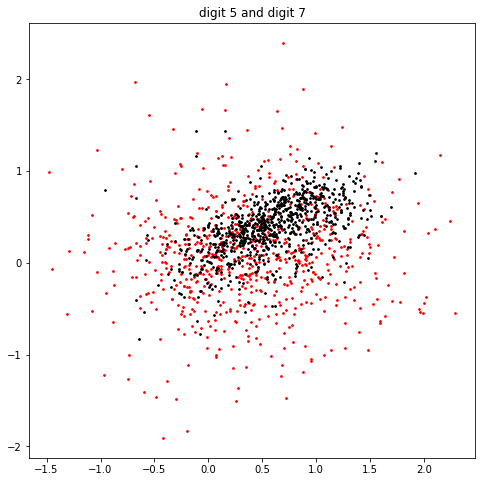

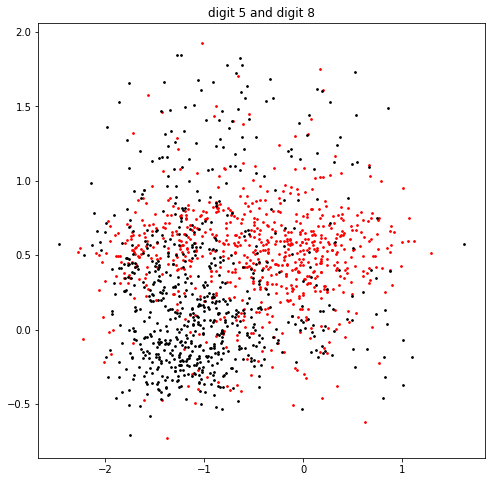

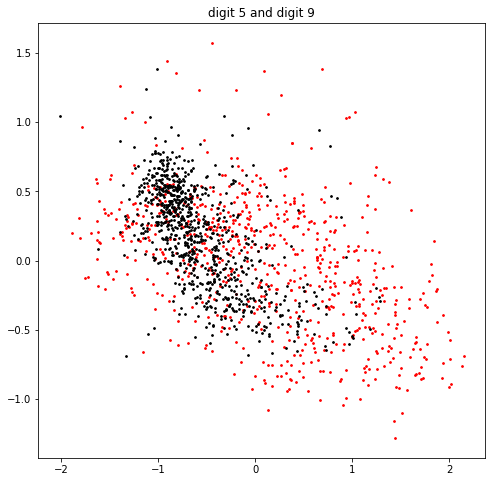

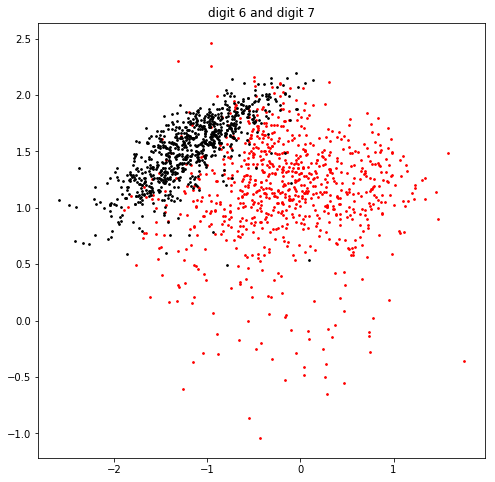

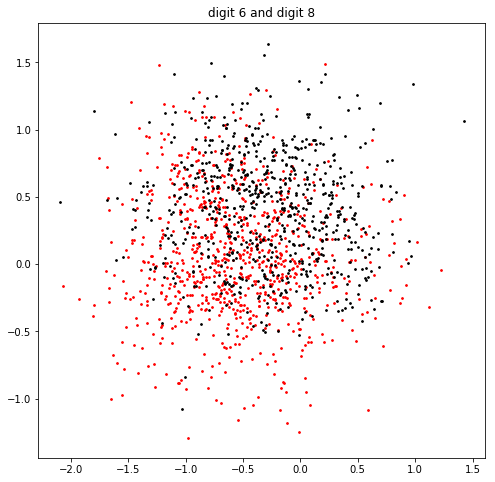

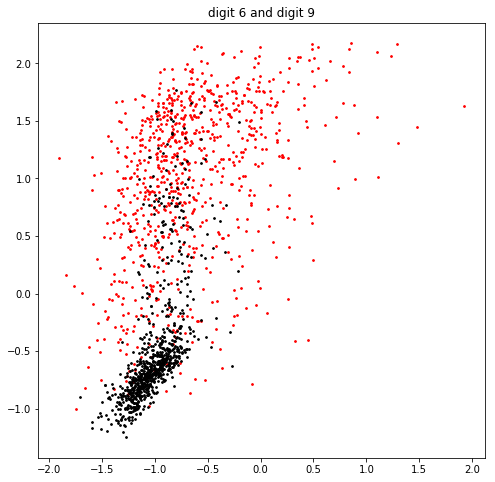

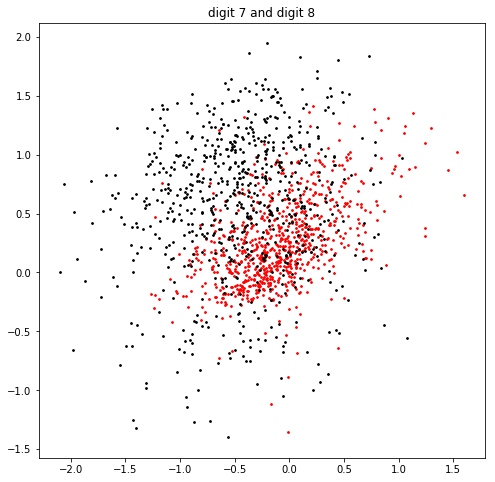

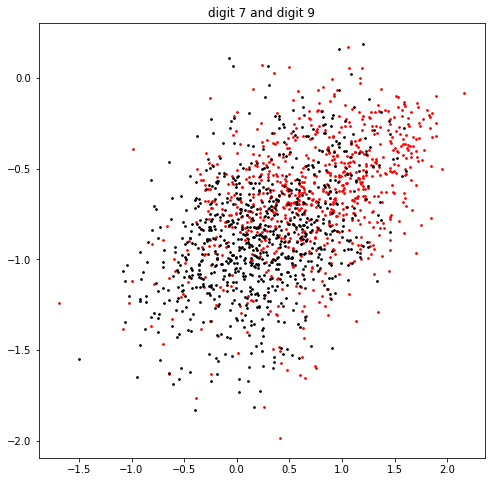

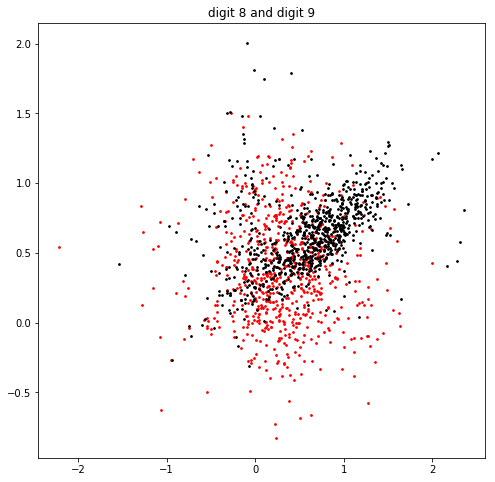

In [77]:
pca = PCA(method='cov')
for i in combinations(range(10), 2):
    pca.fit( np.concatenate((select_lst[i[0]], select_lst[i[1]]), axis = 0))
    
    title = "digit " + str(i[0]) + " and digit " + str(i[1])
    #info1 = "color red for digit " + str(i[0]) 
    #info2 = "color black for digit "+ str(i[1])
    #info = info1 + info2
    
    pca.plot(title)

# Aufgabe 2

In [113]:
path = './lfwcrop_grey/faces/'

In [114]:
import matplotlib.image as mpimg

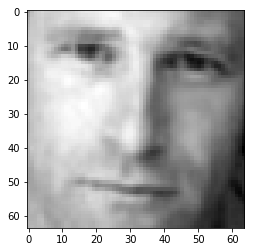

In [115]:
img = mpimg.imread(path)
plt.imshow(img, cmap='gray')

In [116]:
pca = PCA(normalized=False,output_dim=3)
pca.fit(img)

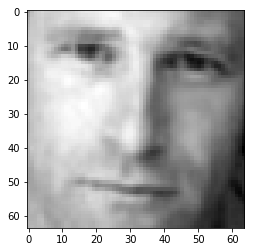

In [125]:
plt.imshow(pca.projected)
plt.imshow(img, cmap = 'gray')

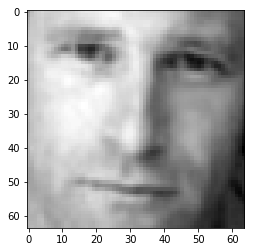

In [86]:
plt.imshow(img, cmap='gray')